<img src="photos/walmart.png">

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
calender = pd.read_csv('/Users/galvanize/Desktop/capstone_3/calendar.csv')

In [3]:
sales= pd.read_csv('/Users/galvanize/Desktop/capstone_3/sales_train_evaluation.csv')


In [4]:
prices = pd.read_csv('/Users/galvanize/Desktop/capstone_3/sell_prices.csv')


In [42]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [41]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [30]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
             var_name='d', value_name='sold')

In [6]:
df1 = pd.merge(df, calendar, on='d', how='left')


In [7]:
dfinal = pd.merge(df1, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

In [8]:
dfinal = dfinal.dropna(axis=0,subset=['sell_price'])

In [13]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46881677 entries, 7 to 59181089
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sold          int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       int64  
 19  snap_TX       int64  
 20  snap_WI       int64  
 21  sell_price    float64
dtypes: float64(1), int64(8), object(13)
memory usage: 8.0+ GB


In [14]:
#take a sample 
import numpy as np

dfinal['sell_price'] = dfinal['sell_price'].replace('-', np.nan)
dfinal = dfinal.dropna(axis=0, subset=['sell_price'])

In [16]:
df_sample=dfinal.sample(n=1000000)

In [17]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 51234612 to 27439797
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1000000 non-null  object 
 1   item_id       1000000 non-null  object 
 2   dept_id       1000000 non-null  object 
 3   cat_id        1000000 non-null  object 
 4   store_id      1000000 non-null  object 
 5   state_id      1000000 non-null  object 
 6   d             1000000 non-null  object 
 7   sold          1000000 non-null  int64  
 8   date          1000000 non-null  object 
 9   wm_yr_wk      1000000 non-null  int64  
 10  weekday       1000000 non-null  object 
 11  wday          1000000 non-null  int64  
 12  month         1000000 non-null  int64  
 13  year          1000000 non-null  int64  
 14  event_name_1  81019 non-null    object 
 15  event_type_1  81019 non-null    object 
 16  event_name_2  1980 non-null     object 
 17  event_type_2  1980 

In [23]:
df_sample['total_net'] = df_sample['sell_price']*df_sample['sold']

In [24]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 51234612 to 27439797
Data columns (total 23 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1000000 non-null  object 
 1   item_id       1000000 non-null  object 
 2   dept_id       1000000 non-null  object 
 3   cat_id        1000000 non-null  object 
 4   store_id      1000000 non-null  object 
 5   state_id      1000000 non-null  object 
 6   d             1000000 non-null  object 
 7   sold          1000000 non-null  int64  
 8   date          1000000 non-null  object 
 9   wm_yr_wk      1000000 non-null  int64  
 10  weekday       1000000 non-null  object 
 11  wday          1000000 non-null  int64  
 12  month         1000000 non-null  int64  
 13  year          1000000 non-null  int64  
 14  event_name_1  81019 non-null    object 
 15  event_type_1  81019 non-null    object 
 16  event_name_2  1980 non-null     object 
 17  event_type_2  1980 

# Analytics

Total amount of items sold by Category

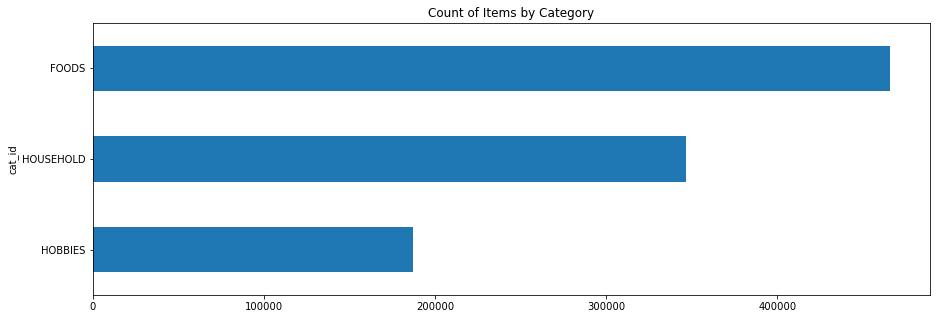

In [18]:
df_sample.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

Lets focus on Hobbies

In [97]:
#sns.set(rc={'figure.figsize': (16,3)})

In [152]:
df_hbs =df_sample.loc[df_sample['cat_id']== 'HOBBIES']

Lets get rid of row with no items sold that day 

In [153]:
indexNames = df_hbs[df_hbs['sold'] == 0].index


In [154]:
df_hbs.drop(indexNames,inplace=True)


In [196]:
df_hbs.describe()

,sold,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price,total_net
count,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000
mean,2.479880,11372.942098,3.879432,6.346489,2013.546369,0.333948,0.333798,0.331934,5.209468,9.236733
std,3.559945,149.597643,2.054061,3.426013,1.526456,0.471626,0.471573,0.470912,4.902826,15.316925
min,1.000000,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.200000,0.200000
25%,1.000000,11239.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000,1.000000,2.770000
50%,1.000000,11404.000000,4.000000,6.000000,2014.000000,0.000000,0.000000,0.000000,3.970000,5.640000
75%,2.000000,11514.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000,7.780000,11.310000
max,128.000000,11617.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000,30.980000,1103.040000


In [192]:
df_hbs[['weekday','total_net']].groupby('weekday').agg({'total_net':'sum'})


,total_net
weekday,
Friday,70876.19
Monday,66144.99
Saturday,86513.90
Sunday,83503.44
Thursday,62728.65
Tuesday,59531.96
Wednesday,61236.05


In [174]:
df_hbs[['year','sold']].groupby('year').agg({'sold':'sum'})


,sold
year,
2011,19725
2012,20012
2013,25114
2014,25980
2015,29056
2016,11812


In [176]:
df_hbs[['month','sold']].groupby('month').agg({'sold':'sum'})


,sold
month,
1,11053
2,11430
3,12503
4,12819
5,12319
6,9987
7,10717
8,10748
9,9454


In [197]:
x = df_hbs['sold'].values

In [188]:
sns.set(rc={'figure.figsize': (16,3)})


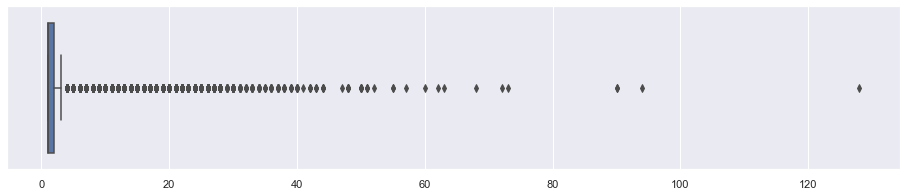

In [189]:
sns.boxplot(x)
#lots of outliers but with the mean being only 5.640000 it can be determine that Hobbies have a lot of 
#different price points

Move to Tableau to do visualizations

# Statitstical Test

In [202]:
from scipy import stats
import os

Lets look into the data again

In [207]:
df_hbs.describe()

,sold,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price,total_net
count,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000,53107.000000
mean,2.479880,11372.942098,3.879432,6.346489,2013.546369,0.333948,0.333798,0.331934,5.209468,9.236733
std,3.559945,149.597643,2.054061,3.426013,1.526456,0.471626,0.471573,0.470912,4.902826,15.316925
min,1.000000,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.200000,0.200000
25%,1.000000,11239.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000,1.000000,2.770000
50%,1.000000,11404.000000,4.000000,6.000000,2014.000000,0.000000,0.000000,0.000000,3.970000,5.640000
75%,2.000000,11514.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000,7.780000,11.310000
max,128.000000,11617.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000,30.980000,1103.040000


In [211]:
df_hbs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53107 entries, 56153525 to 21041524
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            53107 non-null  object 
 1   item_id       53107 non-null  object 
 2   dept_id       53107 non-null  object 
 3   cat_id        53107 non-null  object 
 4   store_id      53107 non-null  object 
 5   state_id      53107 non-null  object 
 6   d             53107 non-null  object 
 7   sold          53107 non-null  int64  
 8   date          53107 non-null  object 
 9   wm_yr_wk      53107 non-null  int64  
 10  weekday       53107 non-null  object 
 11  wday          53107 non-null  int64  
 12  month         53107 non-null  int64  
 13  year          53107 non-null  int64  
 14  event_name_1  4148 non-null   object 
 15  event_type_1  4148 non-null   object 
 16  event_name_2  104 non-null    object 
 17  event_type_2  104 non-null    object 
 18  snap_CA       53

In [212]:
df_hbs.event_name_1.value_counts()

Mother's day           190
Pesach End             182
Ramadan starts         169
ValentinesDay          164
LentStart              162
StPatricksDay          162
Purim End              160
PresidentsDay          154
Halloween              148
SuperBowl              147
OrthodoxEaster         147
EidAlAdha              147
Easter                 147
Eid al-Fitr            145
LentWeek2              143
OrthodoxChristmas      140
LaborDay               139
Chanukah End           139
VeteransDay            137
MemorialDay            137
MartinLutherKingDay    135
NBAFinalsEnd           134
NBAFinalsStart         134
ColumbusDay            134
IndependenceDay        129
Cinco De Mayo          125
Father's day           118
NewYear                103
Thanksgiving            77
Name: event_name_1, dtype: int64

In [272]:
df_hbs.event_type_1.value_counts()

Religious    1534
National     1145
Cultural     1054
Sporting      415
Name: event_type_1, dtype: int64

Visualize data between event type and sales

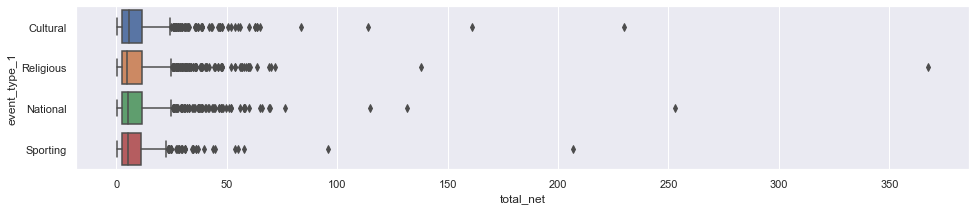

In [220]:
sns.boxplot(y='event_type_1', x='total_net', data=df_hbs)

Visualize date between event type and total items sold 

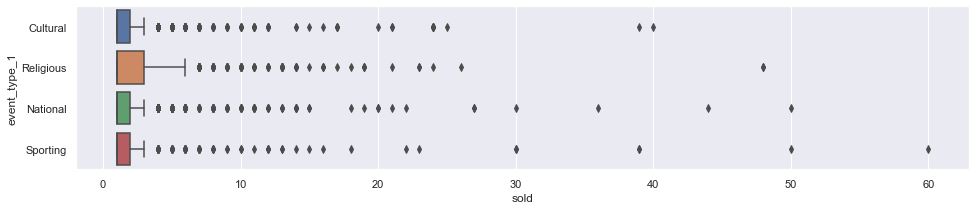

In [221]:
sns.boxplot(y='event_type_1', x='sold', data=df_hbs)

import for stat testing

In [249]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp


TOTAL NET 

From above visuals we can see no difference in Total net in each event cat. Lets test to make sure this is correct. 

Hyp: There is no difference between in total net for each event type

HO: There is difference in total net for each event type


In [ ]:
#using the  F test

In [ ]:
# create a new df with only net and type

In [273]:
df_ho = df_hbs[['event_type_1','total_net']]
df_ho

,event_type_1,total_net
56153525,NaN,7.68
17666133,NaN,12.98
47049169,NaN,5.98
58760695,NaN,16.86
41564311,NaN,2.63
...,...,...
17269636,NaN,13.36
36628009,NaN,4.90
58193225,NaN,6.52
18562393,NaN,3.98


In [295]:
df_ho.event_type_1.value_counts()

Religious    1534
National     1145
Cultural     1054
Sporting      415
Name: event_type_1, dtype: int64

In [292]:
#delete rows with nan in event type

In [274]:
df_ho = df_ho[df_ho['event_type_1'].notna()]
df_ho

In [ ]:
#conduct f-test

In [284]:
grps = pd.unique(df_ho.event_type_1.values)
grps

array(['Cultural', 'Religious', 'National', 'Sporting'], dtype=object)

In [285]:
d_data = {grp:df_ho['total_net'][df_ho.event_type_1 == grp] for grp in grps}

In [287]:
F, p = stats.f_oneway(d_data['National'], d_data['Cultural'], d_data['Sporting'], d_data['Religious'])

In [288]:
print("p-value for significance is: ", p)

p-value for significance is:  0.9559452358382136


In [316]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

fail to reject null hypothesis


If fail to reject H0 then there could be difference in total net for each event type

TOTAL ITEM SOLD

From above visuals we can see Religious items sold more than any other catergory.   Lets test it

Hyp: Religious sell more than other event type

HO: Religious dont sell more than other event type

In [297]:
df_hs = df_hbs[['event_type_1','sold']]
df_hs

,event_type_1,sold
56153525,NaN,1
17666133,NaN,1
47049169,NaN,1
58760695,NaN,1
41564311,NaN,1
...,...,...
17269636,NaN,2
36628009,NaN,7
58193225,NaN,1
18562393,NaN,1


In [298]:
#delete rows with nan in event type
df_hs = df_hs[df_hs['event_type_1'].notna()]
df_hs

,event_type_1,sold
30682249,Cultural,7
2607284,Religious,7
46750678,Religious,2
57367299,Religious,1
51802736,Religious,4
...,...,...
515549,Cultural,1
38935734,Religious,2
1192467,Religious,1
26511228,Cultural,8


In [ ]:
#conduct f-test

In [299]:
b_data = {grp:df_hs['sold'][df_hs.event_type_1 == grp] for grp in grps}

In [308]:
F, r = stats.f_oneway(b_data['National'], b_data['Cultural'], b_data['Sporting'], b_data['Religious'])

In [309]:
print("p-value for significance is: ", r)

p-value for significance is:  0.10594091627431934


In [318]:
if r <0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

fail to reject null hypothesis


We fail to reject that Religious dont sell more than other event type.

This means that there is a chance that it does and nother test need to be conducted.

Below are aternative ways to do the same test

In [313]:
#Net Sales
stats.f_oneway(df_hs['event_type_1'] =='National',
               df_hs['event_type_1'] =='Cultural',
               df_hs['event_type_1'] =='Sporting',
               df_hs['event_type_1'] =='Religious')

F_onewayResult(statistic=291.314102724116, pvalue=2.618807099424289e-184)

In [314]:
#Items Sold
stats.f_oneway(df_ho['event_type_1'] =='National',
               df_ho['event_type_1'] =='Cultural',
               df_ho['event_type_1'] =='Sporting',
               df_ho['event_type_1'] =='Religious')

F_onewayResult(statistic=291.314102724116, pvalue=2.618807099424289e-184)

Visualization of finding have been completed in Tablou